# Correlation between BSS trips and COVID-19

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import and prepare covid data

In [2]:
data_folder = '../data/'
covid_data = pd.read_csv(data_folder + 'covid/treated_data/covid_grouped_by_week.csv')
covid_data.head()

,date,new_cases_ma,new_deaths_ma
0,2020-03-08,2.333333,NaN
1,2020-03-15,11.285714,NaN
2,2020-03-22,87.000000,NaN
3,2020-03-29,335.000000,10.142857
4,2020-04-05,702.857143,33.857143


In [3]:
from modules.DataPreparation import DataPreparation
dp = DataPreparation()

In [4]:
covid_data = dp.transform_to_datetime(covid_data, ['date'])
covid_data = dp.transform_to_time_series(covid_data, 'date', drop=True)
covid_data.head()

,new_cases_ma,new_deaths_ma
date,,
2020-03-08,2.333333,NaN
2020-03-15,11.285714,NaN
2020-03-22,87.000000,NaN
2020-03-29,335.000000,10.142857
2020-04-05,702.857143,33.857143


## Prepare trips data

In [5]:
without_outliers = False

In [6]:
data_folder = '../data/'

if without_outliers:
    source_folder_path =  data_folder + 'trips/analysis/remove_outliers/'
else:
    source_folder_path = data_folder + 'trips/analysis/'

destination_folder_path = data_folder + 'charts/covid/'

In [7]:
trips = pd.read_csv(source_folder_path + 'trips_grouped_by_week_mean.csv')
trips.head()

,date,number_of_trips,tripduration,hour,age,distance,week_day,weekend,holiday
0,2018-01-28,7.000000,3195.305556,14.694444,NaN,961.150000,5.0,0.666667,0.000000
1,2018-02-04,206.714286,3257.159348,14.771210,NaN,1525.477029,3.0,0.285714,0.000000
2,2018-02-11,406.571429,2180.232647,14.011535,NaN,2040.540675,3.0,0.285714,0.000000
3,2018-02-18,324.857143,2643.192332,13.577255,NaN,1537.102057,3.0,0.285714,0.285714
4,2018-02-25,679.142857,1976.894768,13.585183,NaN,2078.078232,3.0,0.285714,0.000000


In [8]:
from modules.DataPreparation import DataPreparation
dp = DataPreparation()

In [9]:
trips = dp.transform_to_datetime(trips, ['date'])

In [10]:
trips = dp.transform_to_time_series(trips, 'date', drop = True)

In [11]:
trips

,number_of_trips,tripduration,hour,age,distance,week_day,weekend,holiday
date,,,,,,,,
2018-01-28,7.000000,3195.305556,14.694444,NaN,961.150000,5.0,0.666667,0.000000
2018-02-04,206.714286,3257.159348,14.771210,NaN,1525.477029,3.0,0.285714,0.000000
2018-02-11,406.571429,2180.232647,14.011535,NaN,2040.540675,3.0,0.285714,0.000000
2018-02-18,324.857143,2643.192332,13.577255,NaN,1537.102057,3.0,0.285714,0.285714
2018-02-25,679.142857,1976.894768,13.585183,NaN,2078.078232,3.0,0.285714,0.000000
...,...,...,...,...,...,...,...,...
2022-04-03,5476.714286,3182.551529,13.428534,31.861236,2337.779509,3.0,0.285714,0.000000
2022-04-10,6428.428571,3123.482318,13.565793,31.841474,2361.212054,3.0,0.285714,0.000000
2022-04-17,5489.714286,3253.299497,13.563658,32.227992,2311.477582,3.0,0.285714,0.000000


## Merge COVID and trip data

In [12]:
trips_and_covid = pd.merge(trips, covid_data, how = 'outer',left_index=True, right_index=True)
trips_and_covid

,number_of_trips,tripduration,hour,age,distance,week_day,weekend,holiday,new_cases_ma,new_deaths_ma
date,,,,,,,,,,
2018-01-28,7.000000,3195.305556,14.694444,NaN,961.150000,5.0,0.666667,0.000000,NaN,NaN
2018-02-04,206.714286,3257.159348,14.771210,NaN,1525.477029,3.0,0.285714,0.000000,NaN,NaN
2018-02-11,406.571429,2180.232647,14.011535,NaN,2040.540675,3.0,0.285714,0.000000,NaN,NaN
2018-02-18,324.857143,2643.192332,13.577255,NaN,1537.102057,3.0,0.285714,0.285714,NaN,NaN
2018-02-25,679.142857,1976.894768,13.585183,NaN,2078.078232,3.0,0.285714,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-07-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48868.571429,239.428571
2022-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36190.714286,229.285714
2022-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30317.428571,212.571429


In [13]:
trips_and_covid = trips_and_covid[:'2022-05-01']
trips_and_covid

,number_of_trips,tripduration,hour,age,distance,week_day,weekend,holiday,new_cases_ma,new_deaths_ma
date,,,,,,,,,,
2018-01-28,7.000000,3195.305556,14.694444,NaN,961.150000,5.0,0.666667,0.000000,NaN,NaN
2018-02-04,206.714286,3257.159348,14.771210,NaN,1525.477029,3.0,0.285714,0.000000,NaN,NaN
2018-02-11,406.571429,2180.232647,14.011535,NaN,2040.540675,3.0,0.285714,0.000000,NaN,NaN
2018-02-18,324.857143,2643.192332,13.577255,NaN,1537.102057,3.0,0.285714,0.285714,NaN,NaN
2018-02-25,679.142857,1976.894768,13.585183,NaN,2078.078232,3.0,0.285714,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-04-03,5476.714286,3182.551529,13.428534,31.861236,2337.779509,3.0,0.285714,0.000000,25300.285714,204.571429
2022-04-10,6428.428571,3123.482318,13.565793,31.841474,2361.212054,3.0,0.285714,0.000000,21517.571429,170.714286
2022-04-17,5489.714286,3253.299497,13.563658,32.227992,2311.477582,3.0,0.285714,0.000000,18220.714286,119.857143


In [14]:
trips_and_covid['age'].first_valid_index()

Timestamp('2020-01-05 00:00:00')

In [15]:
trips_and_covid = trips_and_covid.rename({'distance_in_meters_bicycle':'distance'}, axis = 1)

## Correlation

In [16]:
def plot_all_correlations(data):
    # get the data correlation matrix
    corr = data.corr()
    plt.figure(figsize=(9, 7))
    plt.imshow(corr.abs(), cmap='Blues', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr)), corr.columns)
    plt.suptitle('Absolute Correlation between variables', fontsize=15, fontweight='bold')
    plt.grid(False)
    plt.show()
    return corr

def plot_target_variable_correlation(data, corr, target_variable, without_outliers = False):
    correlation = np.array(corr[target_variable])
    # remove correlation with itself
    correlation = np.delete(correlation, np.where(correlation == 1))
    columns = np.array(data.keys())
    columns =  np.delete(columns, np.where(columns == target_variable))
    plt.figure(figsize=(15, 7))
    plt.bar(columns, correlation)
    for i in range(len(correlation)):
        if correlation[i] > 0:
            va="bottom"
        else:
            va="top"
        plt.text(i, correlation[i], round(correlation[i], 2), ha="center", va=va)
    title = "Correlation with '{variable}' variable".format(variable = target_variable)
    if without_outliers:
        title = title + ' (without outliers)'
    plt.title(title)
    if without_outliers:
        filename = target_variable + '_without_outliers.png'
    else:
        filename = target_variable + '.png'
    plt.savefig(destination_folder_path + 'correlation/' + filename)
    plt.show(True)

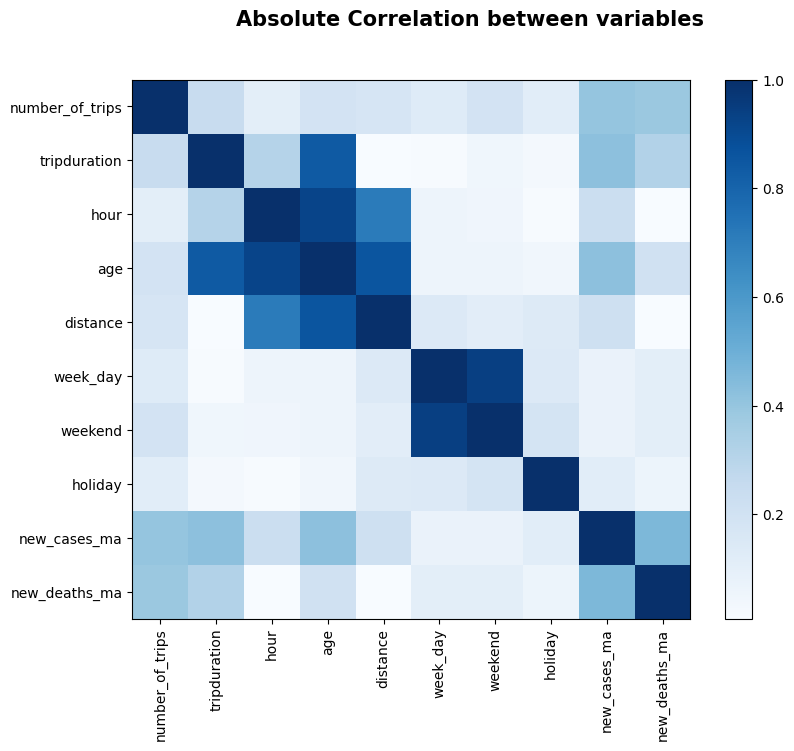

In [17]:
correlation_matrix = plot_all_correlations(trips_and_covid)

## COVID-19 cases

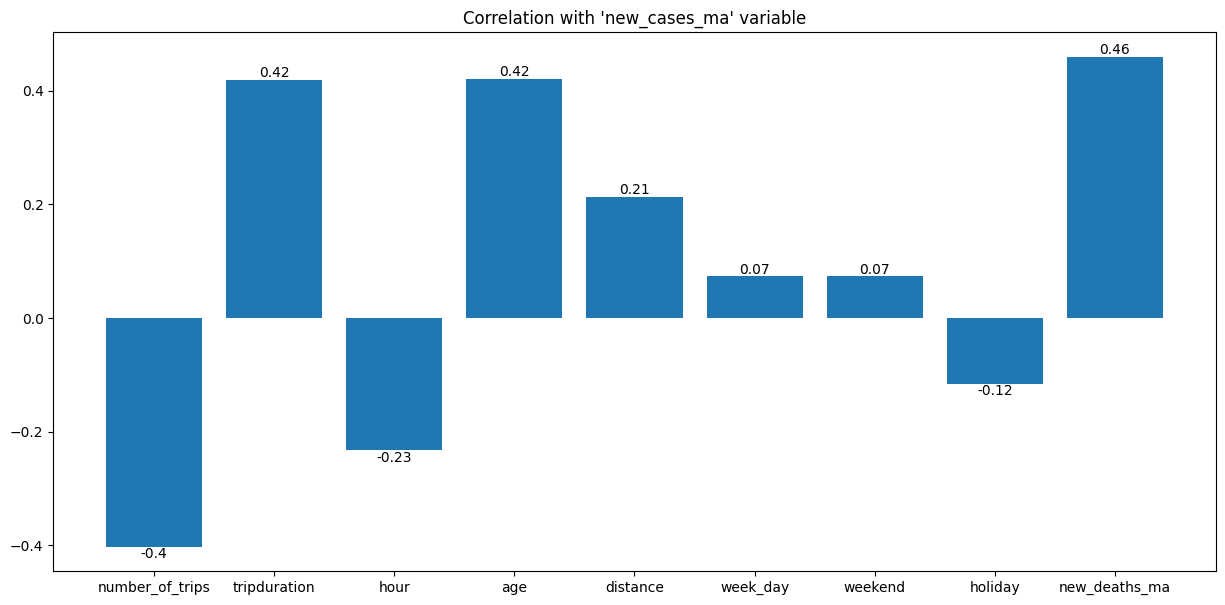

In [18]:
correlation_with_variable = plot_target_variable_correlation(trips_and_covid, correlation_matrix,
                                                            'new_cases_ma',
                                                             without_outliers = without_outliers)

## COVID-19 deaths

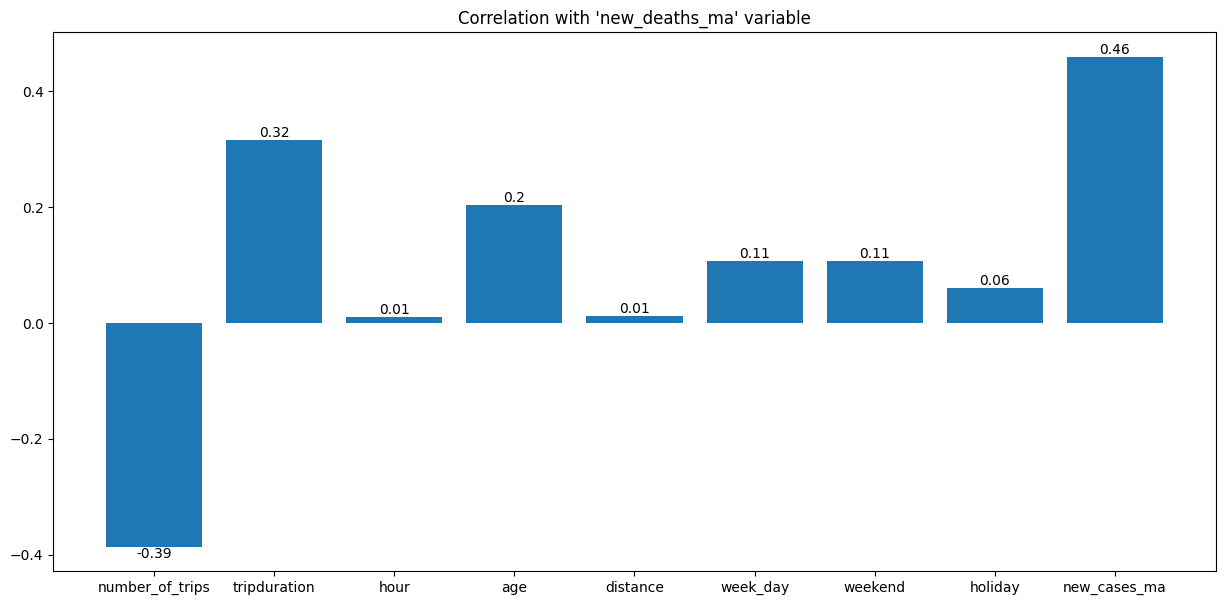

In [19]:
correlation_with_variable = plot_target_variable_correlation(trips_and_covid, correlation_matrix,
                                                            'new_deaths_ma',
                                                             without_outliers = without_outliers)

### Plot together

In [20]:
def plot_variable_and_covid_together(variable, covid_variable):
    trips_and_covid_plot = trips_and_covid.filter([variable, covid_variable])
    plt.gcf().set_size_inches(20, 1)
    ax = trips_and_covid_plot.plot(secondary_y = covid_variable, ylim=(0,None), label = 'Número médio de viagens diárias',
                                   figsize = (20,11))
    title = "'{variable}' vs '{covid_variable}'".format(variable = variable, covid_variable = covid_variable)
    plt.title(title)
    ax.axvline('2020-03-24', color="black", linestyle="--",  label='Início da quarentena')
    ax.axvline('2020-05-27', color="purple", linestyle="--",  label='Plano SP de retomada consciente')
    ax.axvline('2020-10-06', color="green", linestyle="--",  label='Fase Verde')
    ax.axvline('2020-11-30', color="yellow", linestyle="--",  label='Fase Amarela')
    ax.axvline('2021-03-15', color="red", linestyle="--",  label='Fase Emergencial')
    ax.axvline('2021-08-17', color="green", linestyle="--",  label='Fase Verde')
    ax.axvline('2021-11-01', color="m", linestyle="--",  label='Fim das restrições')
    plt.ylim(bottom=0)
    plt.axis([None, None, 0, None])
    ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left')
    if without_outliers:
        filename = variable + '_vs_'+ covid_variable+'_without_ouliers.png'
    else:
        filename = variable + '_vs_'+ covid_variable+'.png'
    plt.savefig(destination_folder_path + 'versus_covid/'+filename)
    plt.show()

In [21]:
import numpy as np
np.concatenate((list(range(0,14401,1200)), [28800, 57600]))

array([    0,  1200,  2400,  3600,  4800,  6000,  7200,  8400,  9600,
       10800, 12000, 13200, 14400, 28800, 57600])

In [22]:
28800*2


57600

In [72]:
def alt_bands(start, end, ax=None, color = 'black'):
    ax = ax or plt.gca()
    x_left, x_right = ax.get_xlim()
    ax.axvspan(start, end, facecolor=color, alpha=0.1)
    ax.set_xlim(x_left, x_right)

def plot_variable_and_covid_together(variable, covid_variable):
    trips_and_covid_plot = trips_and_covid[:].filter([variable, covid_variable])
    fig, ax = plt.subplots()
    fig.set_figwidth(20)
    fig.set_figheight(10)
    ax2 = ax.twinx()
    ax.plot(trips_and_covid_plot.index, trips_and_covid_plot[variable], 'g-', label = 'Number of trips')
    ax2.plot(trips_and_covid_plot.index, trips_and_covid_plot[covid_variable], 'b-', label = 'New cases of COVID-19')
    ax2.set_ylim(0)
    ax.set_ylim(0)
    ax.set_xlabel('Date', fontsize=20, labelpad = 20)
    ax.set_ylabel('Number of trips', color='k', fontsize=20, labelpad = 20)
    ax2.set_ylabel('New cases of covid', color='k', fontsize=20)
    if True:
        title = "Number of trips vs New cases of covid"
    else:    
        title = "'{variable}' vs '{covid_variable}'".format(variable = variable, covid_variable = covid_variable)
    plt.title(title, size=25, pad = 20)
    ax.axvline(pd.to_datetime('2020-03-24'), color="black", linestyle="--",  label='Lockdown in SP', linewidth = 3.0)
    # alt_bands('2020-03-24', '2020-05-27', ax, 'black')
    # ax.axvline(pd.to_datetime('2020-05-27'), color="purple", linestyle="--",  label='Retomada consciente', linewidth = 3.0)
    # alt_bands('2020-03-24', '2020-05-27', ax, 'black')
    # ax.axvline(pd.to_datetime('2020-10-06'), color="green", linestyle="--",  label='Fase Verde', linewidth = 3.0)
    # ax.axvline(pd.to_datetime('2020-11-30'), color="yellow", linestyle="--",  label='Fase Amarela', linewidth = 3.0)
    # ax.axvline(pd.to_datetime('2021-03-15'), color="red", linestyle="--",  label='Fase Emergencial', linewidth = 3.0)
    # ax.axvline(pd.to_datetime('2021-08-17'), color="green", linestyle="--",  label='Fase Verde', linewidth = 3.0)
    ax.axvline(pd.to_datetime('2021-11-01'), color="m", linestyle="--",  label='End of COVID-19 restrictions', linewidth = 3.0)
    plt.ylim(bottom=0)
    plt.axis([None, None, 0, None])
    # Set tick font size
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(16)
    ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fontsize = 18)
    ax2.legend(bbox_to_anchor=(1.15, 1), loc='lower left', fontsize = 18)
    if without_outliers:
        filename = variable + '_vs_'+ covid_variable+'_without_ouliers.png'
    else:
        filename = variable + '_vs_'+ covid_variable+'.png'
    # plt.savefig(destination_folder_path + 'versus_covid/'+filename)
    plt.show()

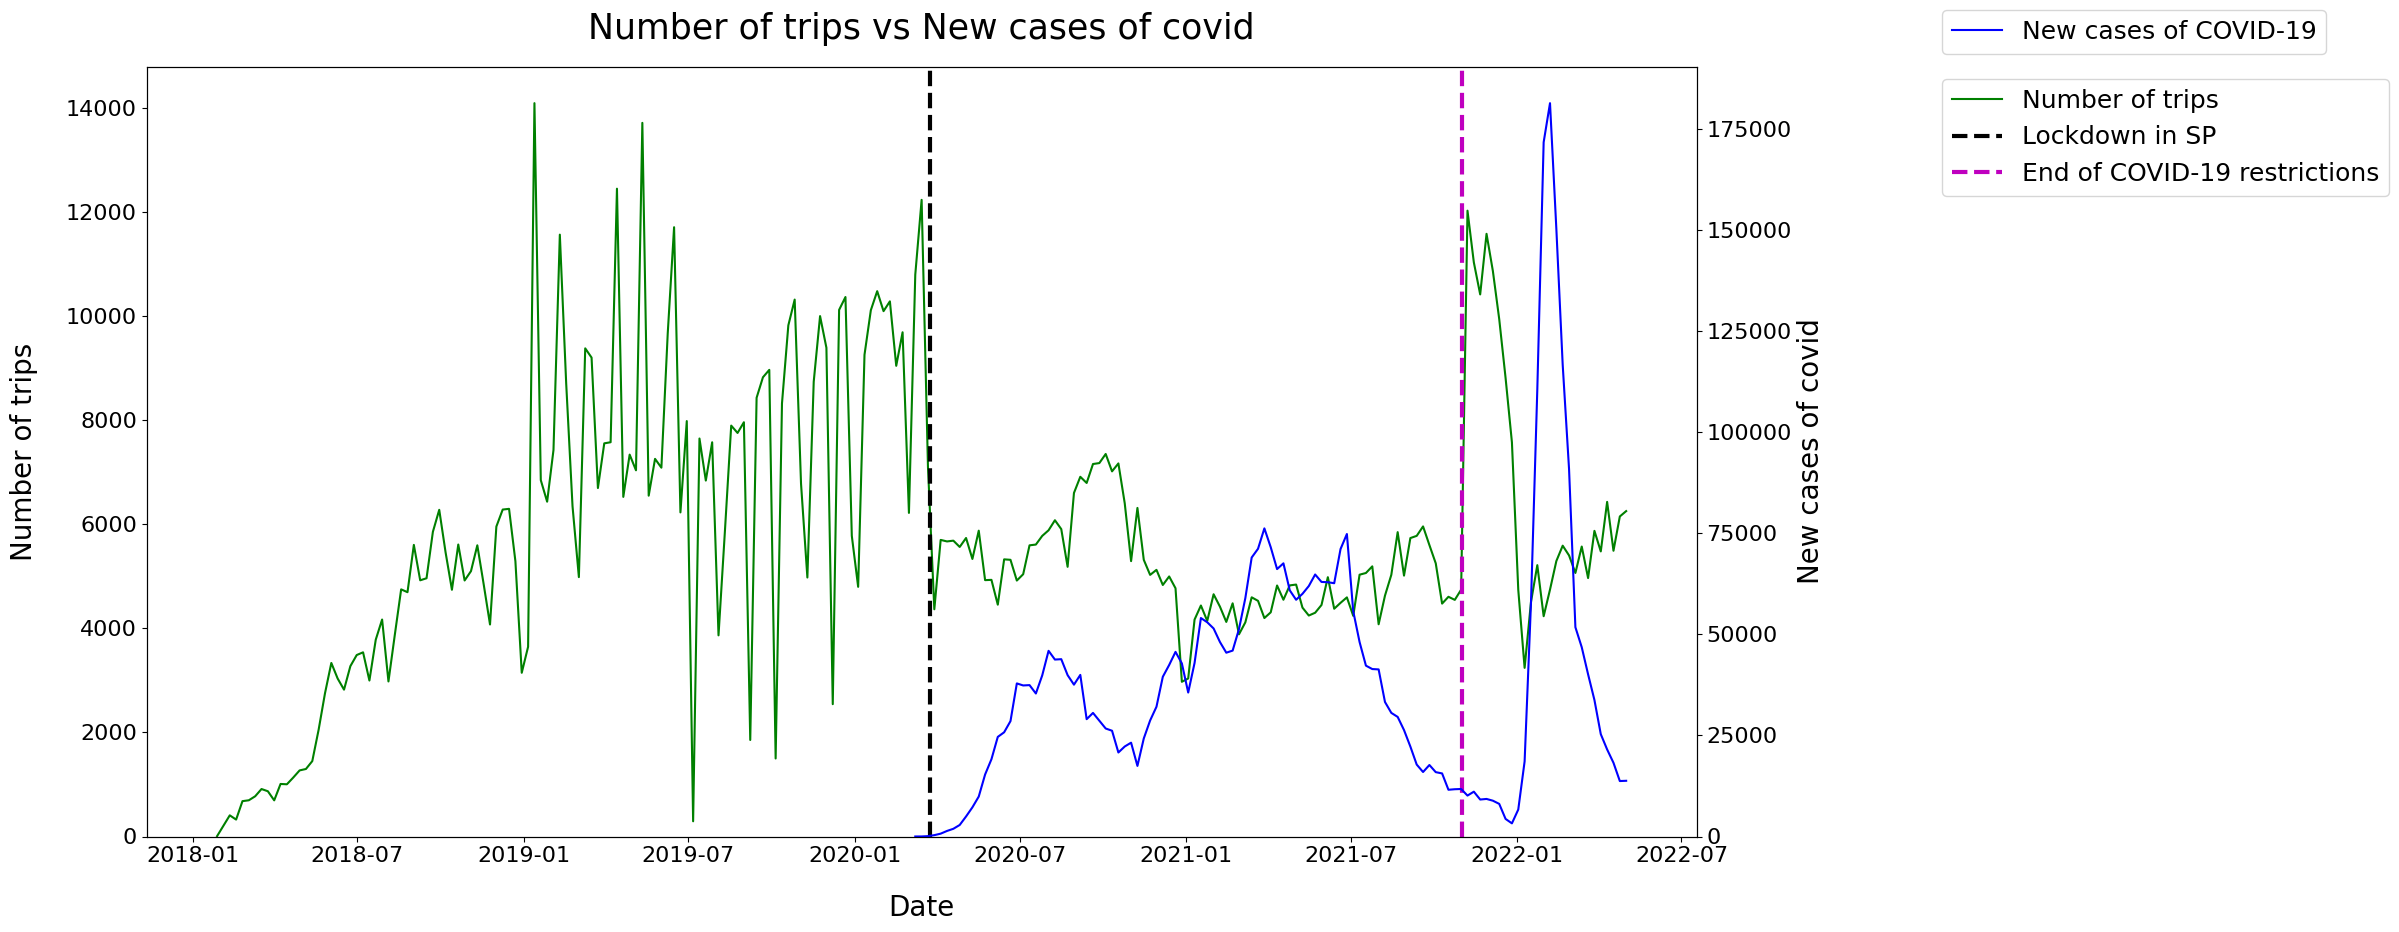

In [73]:
variable = 'number_of_trips'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

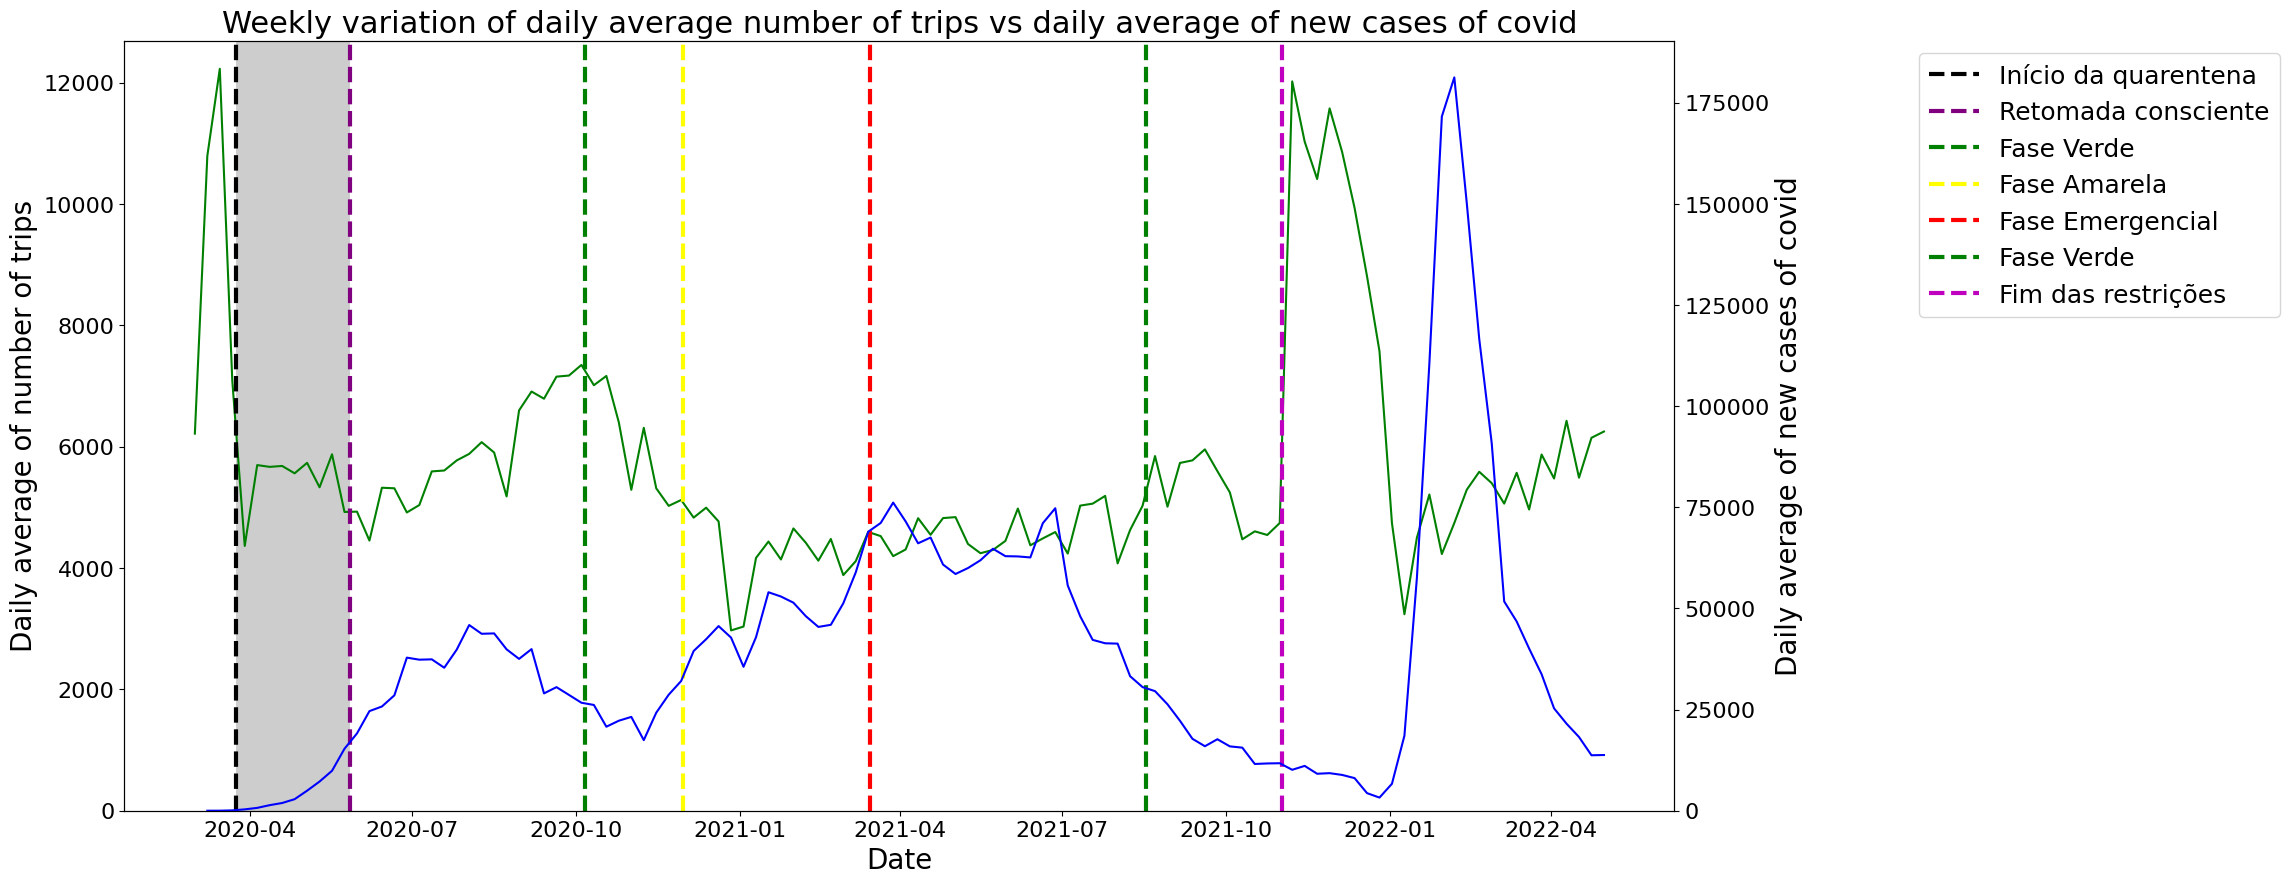

In [24]:
variable = 'number_of_trips'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

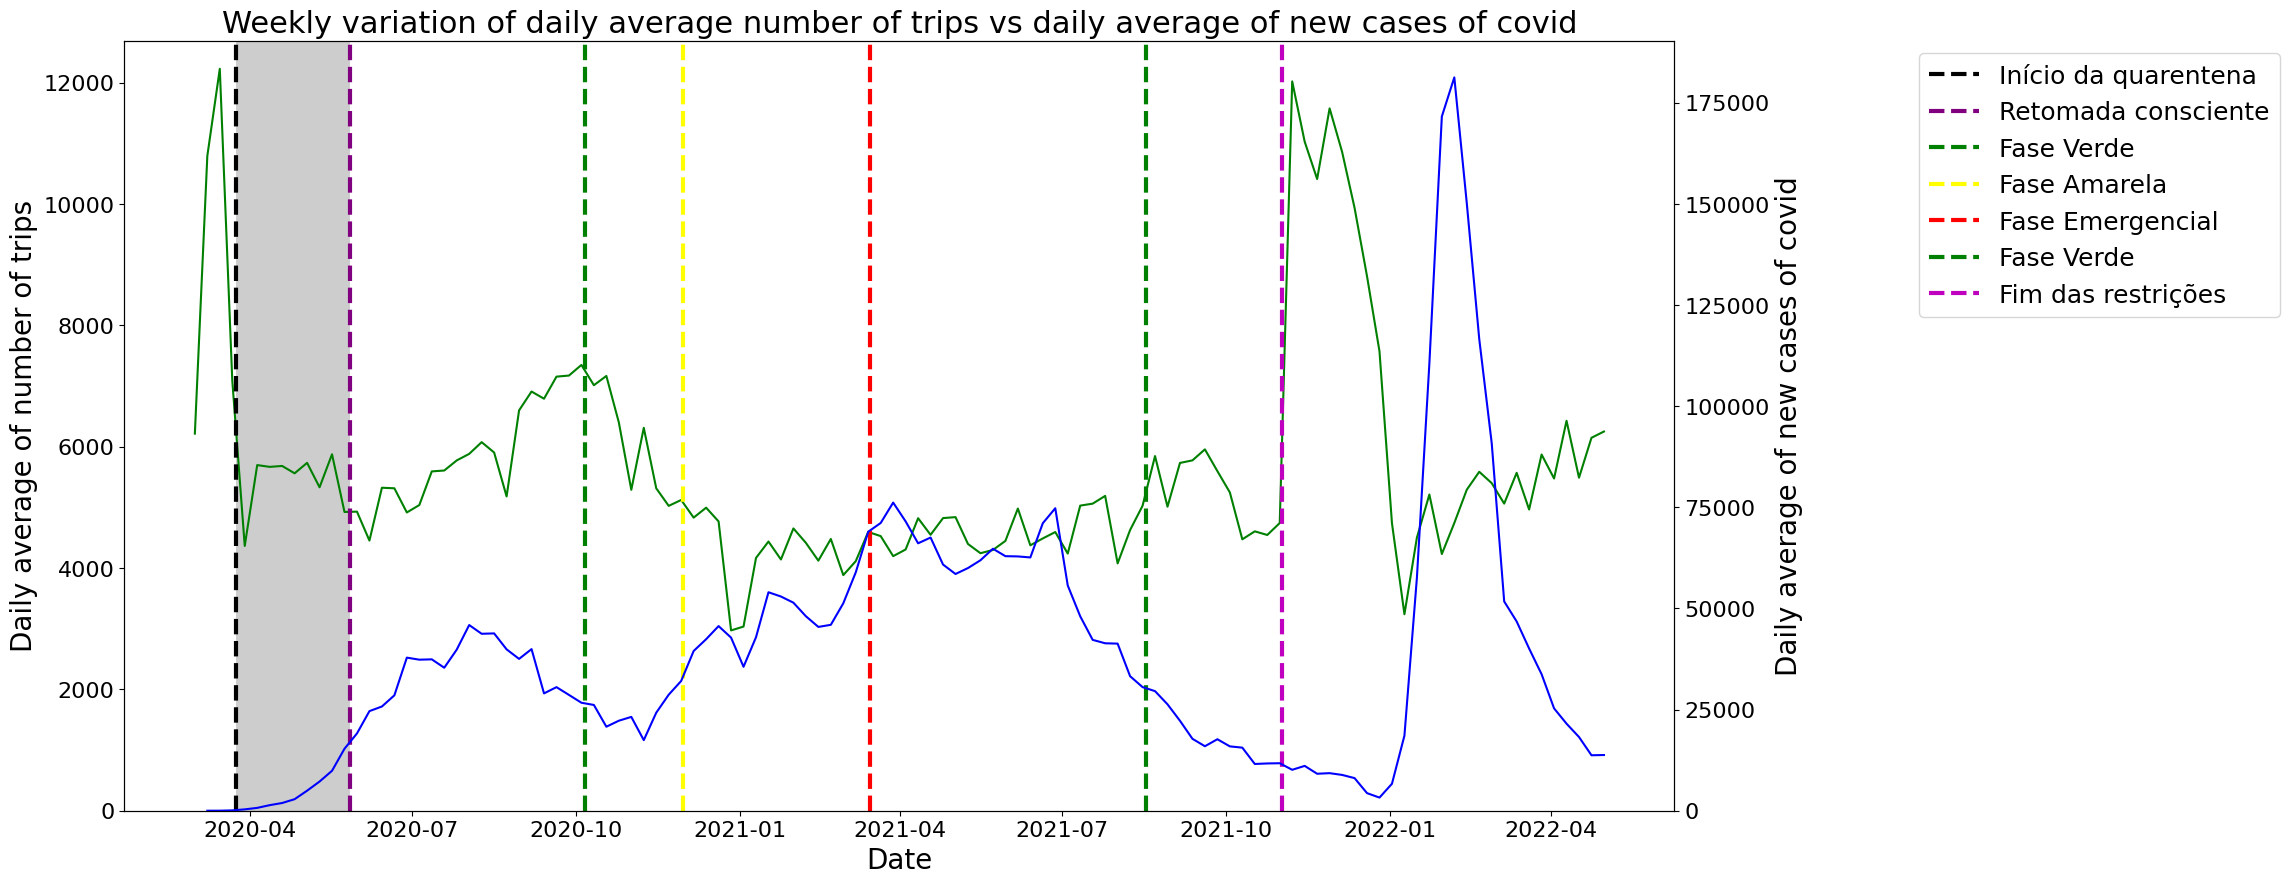

In [25]:
variable = 'number_of_trips'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

In [26]:
import matplotlib.dates as mdates
def alt_bands(start, end, ax=None):
    ax = ax or plt.gca()
    x_left, x_right = ax.get_xlim()
    ax.axvspan(start, end, facecolor='red', alpha=0.1)
    ax.set_xlim(x_left, x_right)

def plot_variable(variable, period = 0, interval = 1):
    if period == -1:
        trips = trips_and_covid['2019':'2020-02']
    elif period == 1:
        trips = trips_and_covid['2020-3':]
    else:
        trips = trips_and_covid
    trips_and_covid_plot = trips.filter([variable, covid_variable])
    fig, ax = plt.subplots()
    fig.set_figwidth(20)
    fig.set_figheight(10)
    ax.plot(trips_and_covid_plot.index, trips_and_covid_plot[variable], 'g-')
    if period == 0:
        ax.axvline(pd.to_datetime('2020-03-24'), color="black", linestyle="--",  label='Início da quarentena')
    ax.set_ylim(0)
    ax.set_xlabel('Date', fontsize=20, labelpad = 10)
    ax.set_ylabel('Daily average of number of trips', fontsize=20, labelpad = 15)

    # set monthly locator
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=interval))
    # set formatter
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    # set font and rotation for date tick labels
    plt.gcf().autofmt_xdate()

    if True:
        title = "Weekly variation of the average daily number of trips"
    else:    
        title = "'{variable}' vs '{covid_variable}'".format(variable = variable, covid_variable = covid_variable)
    plt.title(title, size=22, pad = 10)
    plt.ylim(bottom=0)
    plt.axis([None, None, 0, None])
    # Set tick font size
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
    if without_outliers:
        filename = variable +'_without_ouliers.png'
    else:
        filename = variable + '.png'
    # plt.savefig(destination_folder_path + 'versus_covid/'+filename)
    plt.show()

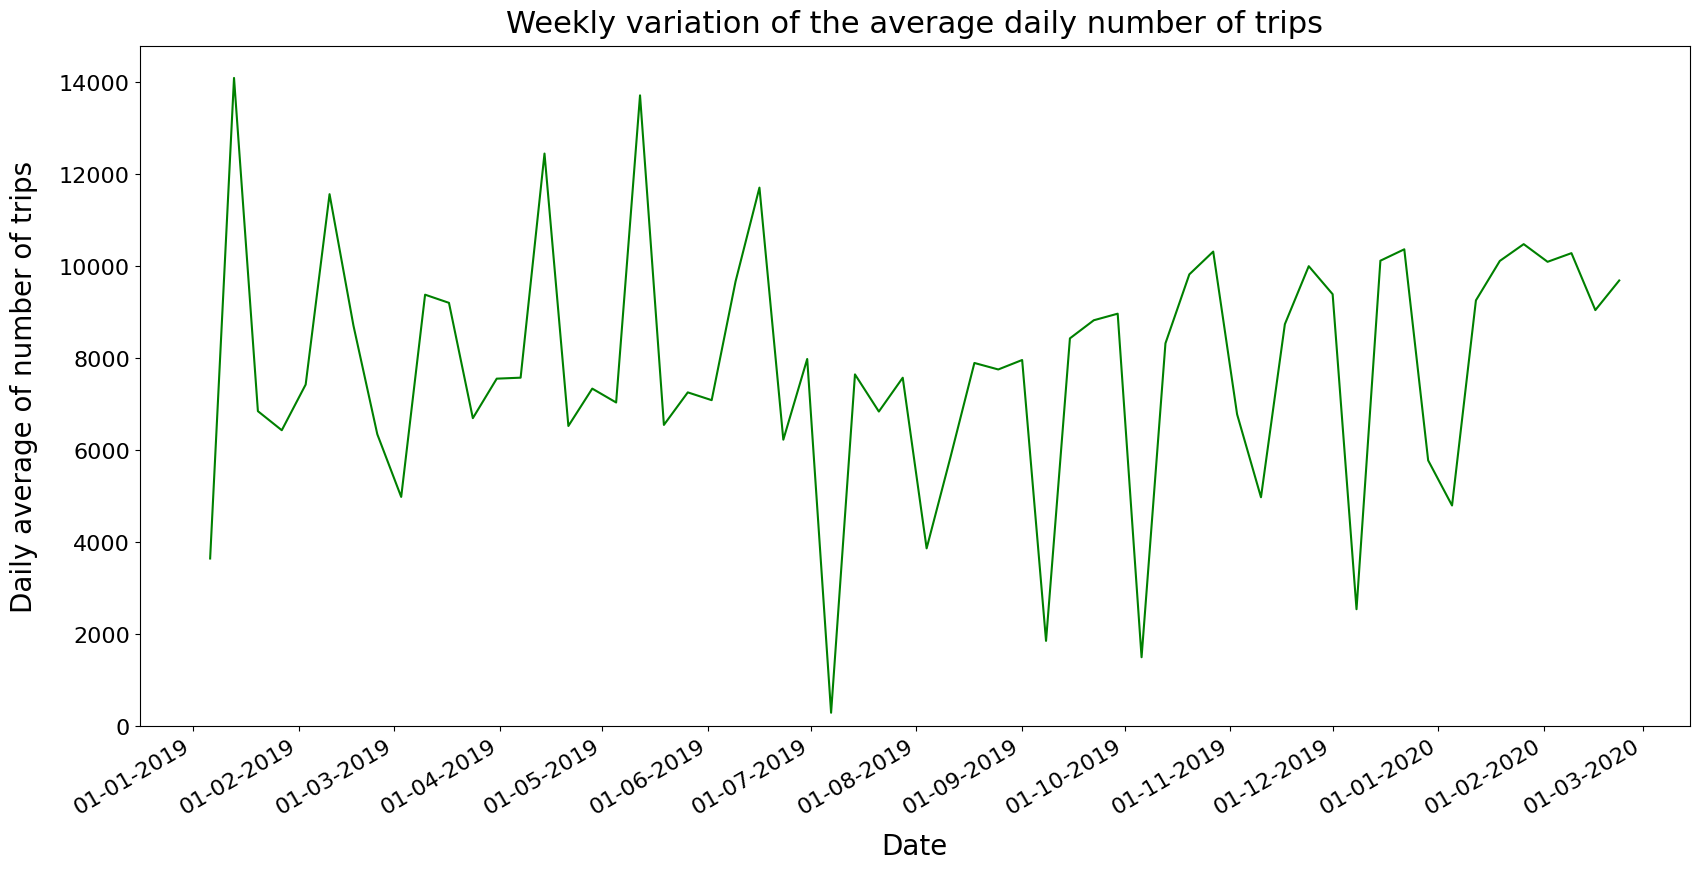

In [27]:
variable = 'number_of_trips'
covid_variable = 'new_cases_ma'
plot_variable(variable, -1)

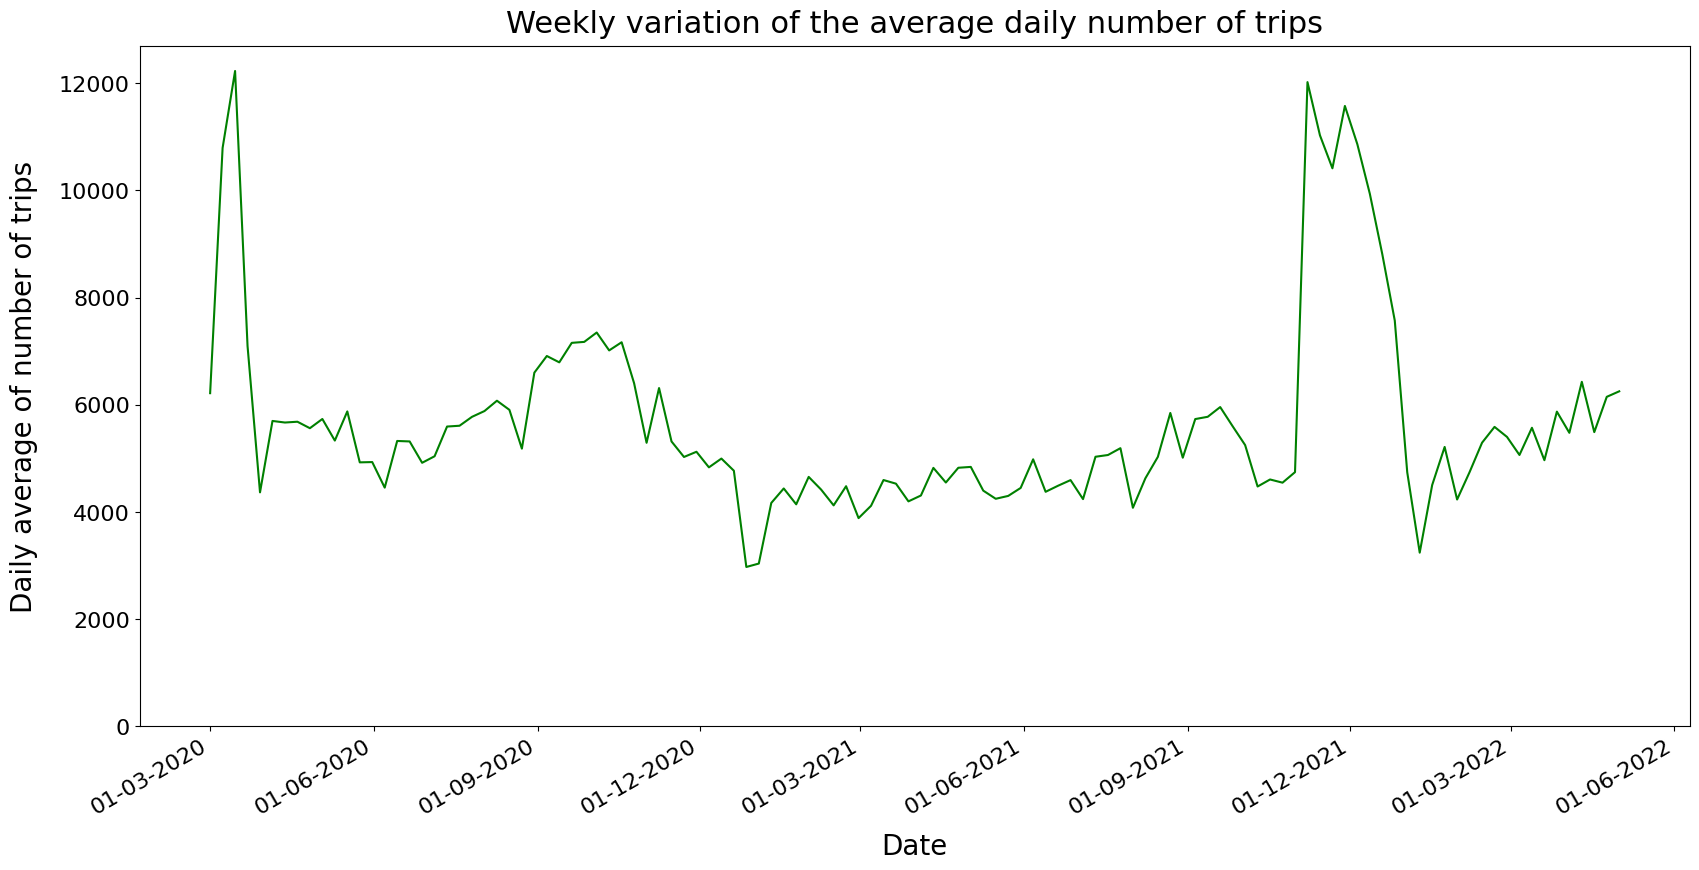

In [28]:
variable = 'number_of_trips'
plot_variable(variable, 1, 3)

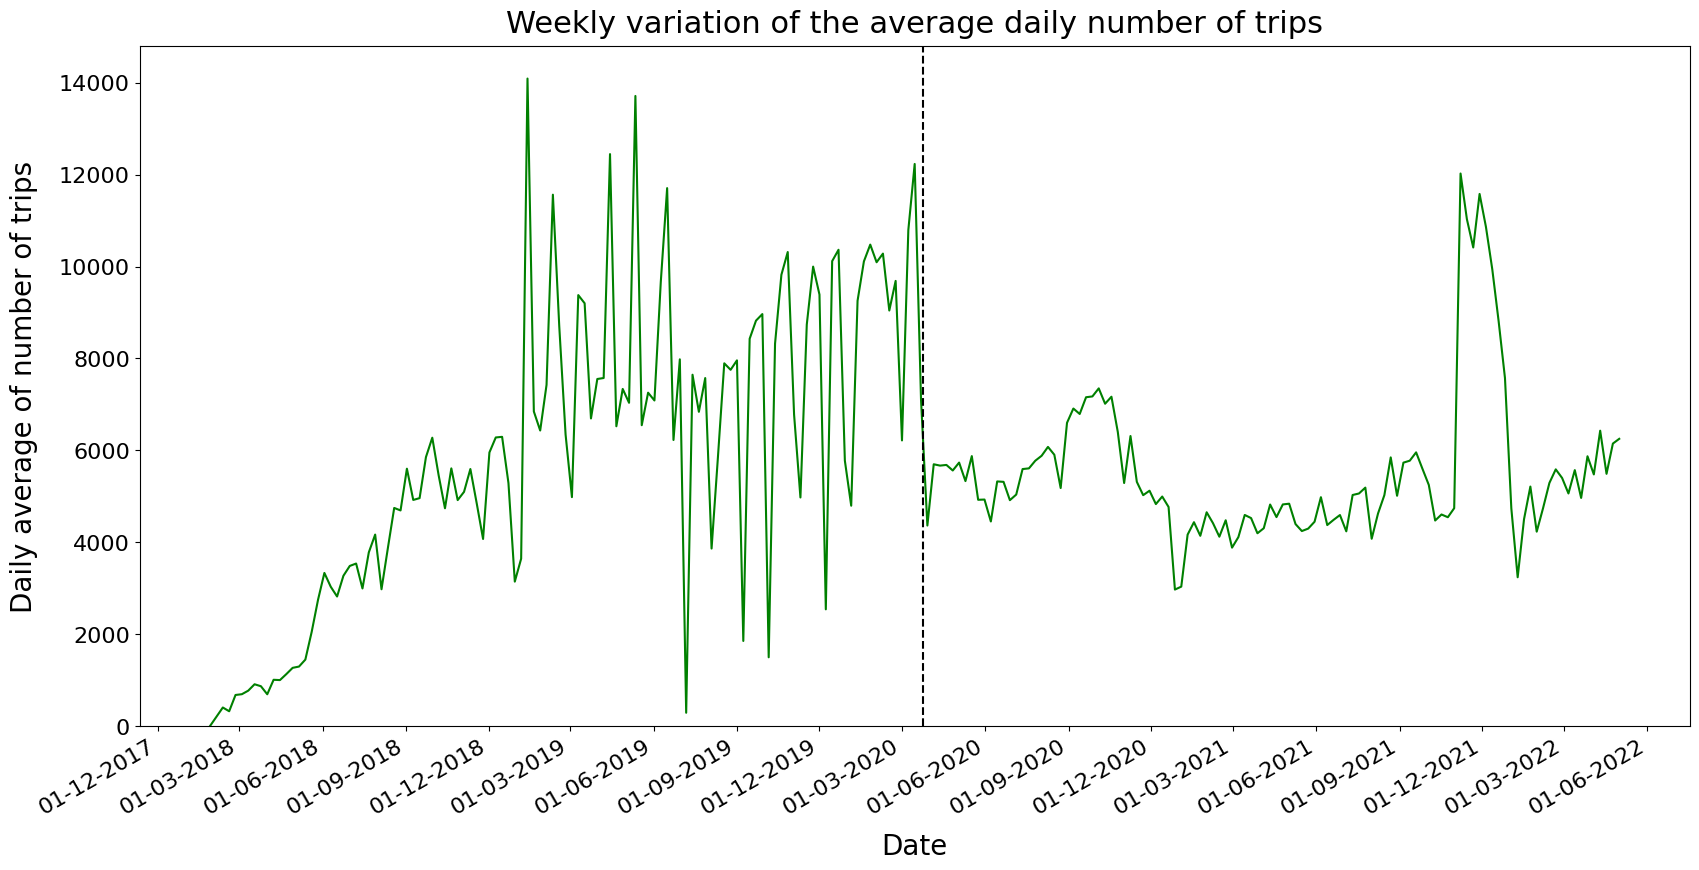

In [29]:
variable = 'number_of_trips'
covid_variable = 'new_cases_ma'
plot_variable(variable, 0,3)

<AxesSubplot:xlabel='date'>

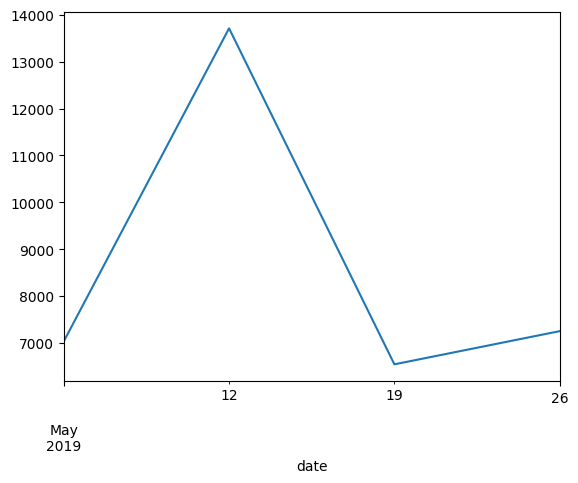

In [30]:
trips_and_covid['number_of_trips']['2019-05'].plot()

<AxesSubplot:xlabel='date'>

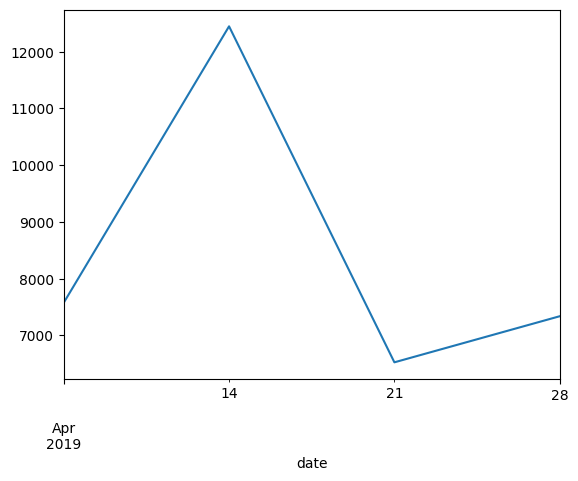

In [31]:
trips_and_covid['number_of_trips']['2019-04'].plot()

<AxesSubplot:xlabel='date'>

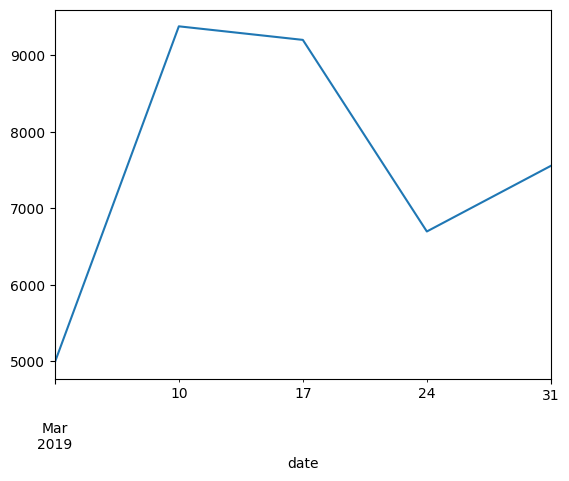

In [32]:
trips_and_covid['number_of_trips']['2019-03'].plot()

<AxesSubplot:xlabel='date'>

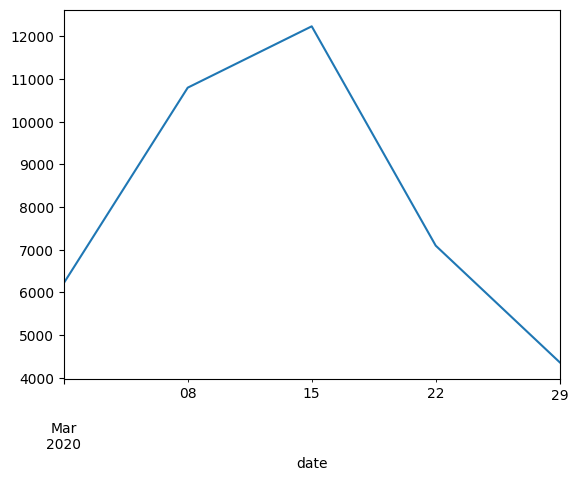

In [33]:
trips_and_covid['number_of_trips']['2020-03'].plot()

<AxesSubplot:xlabel='date'>

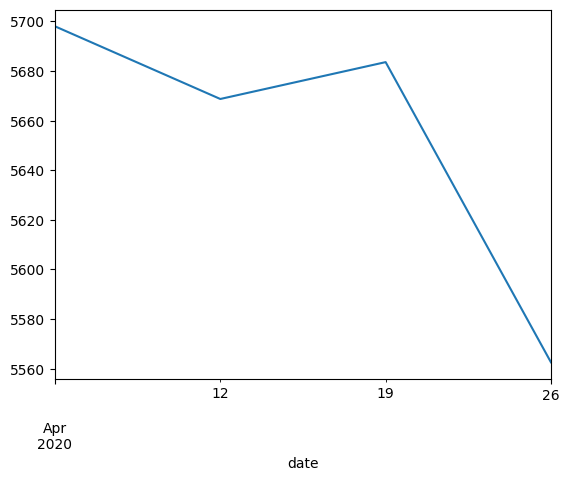

In [34]:
trips_and_covid['number_of_trips']['2020-04'].plot()

TypeError: alt_bands() takes from 2 to 3 positional arguments but 4 were given

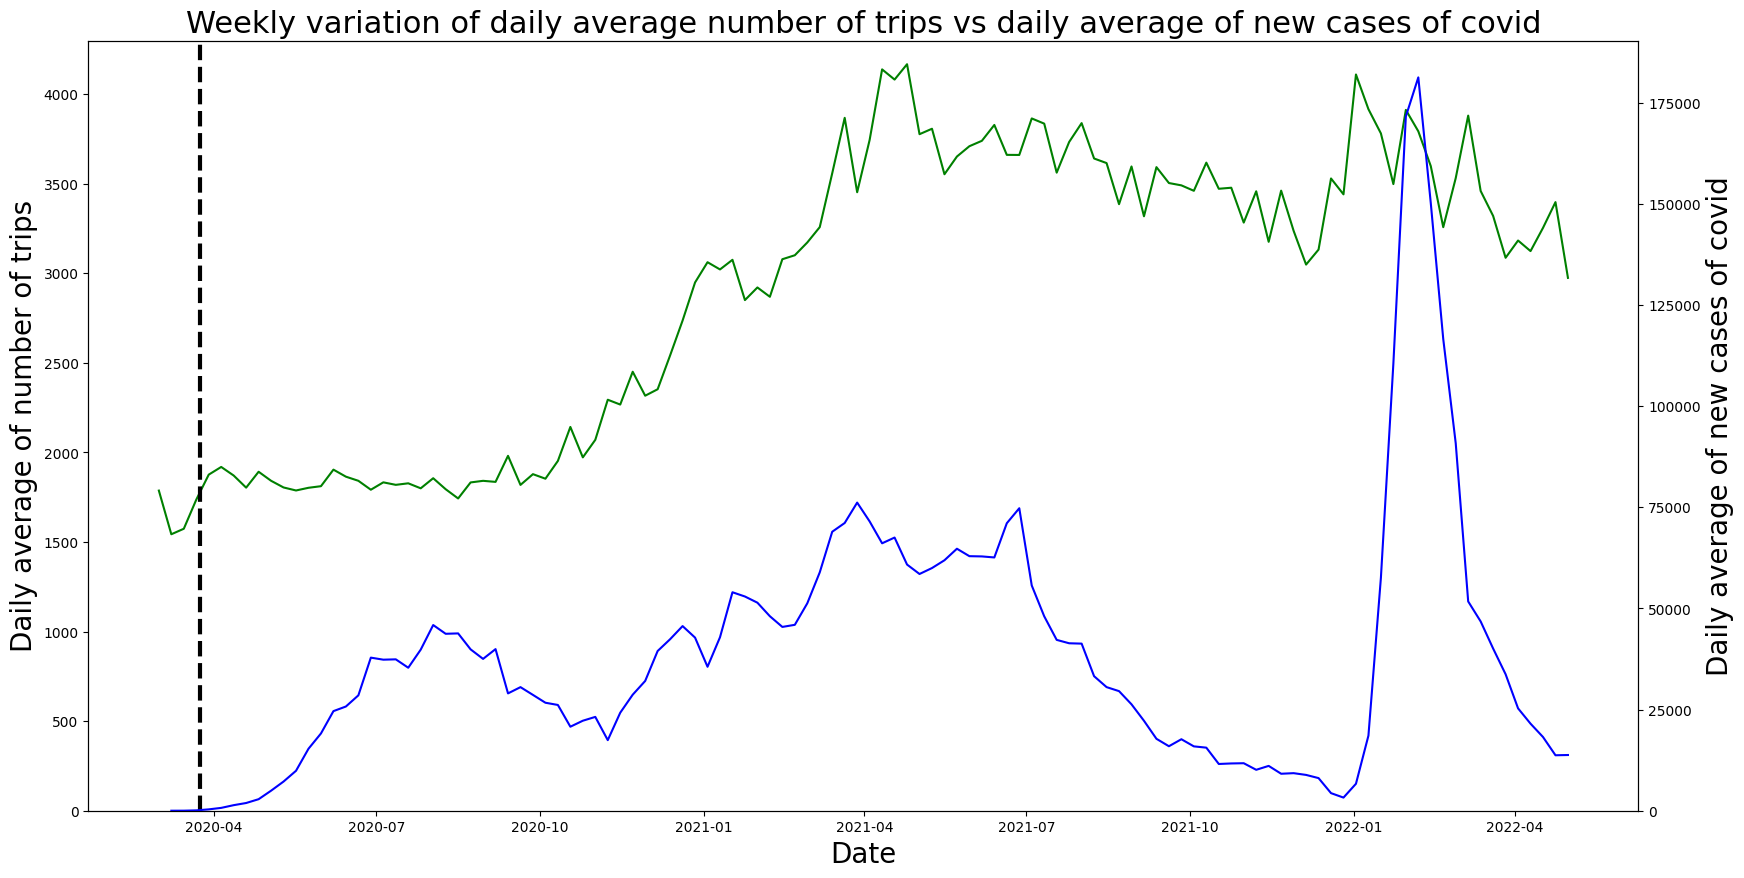

In [36]:
variable = 'tripduration'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

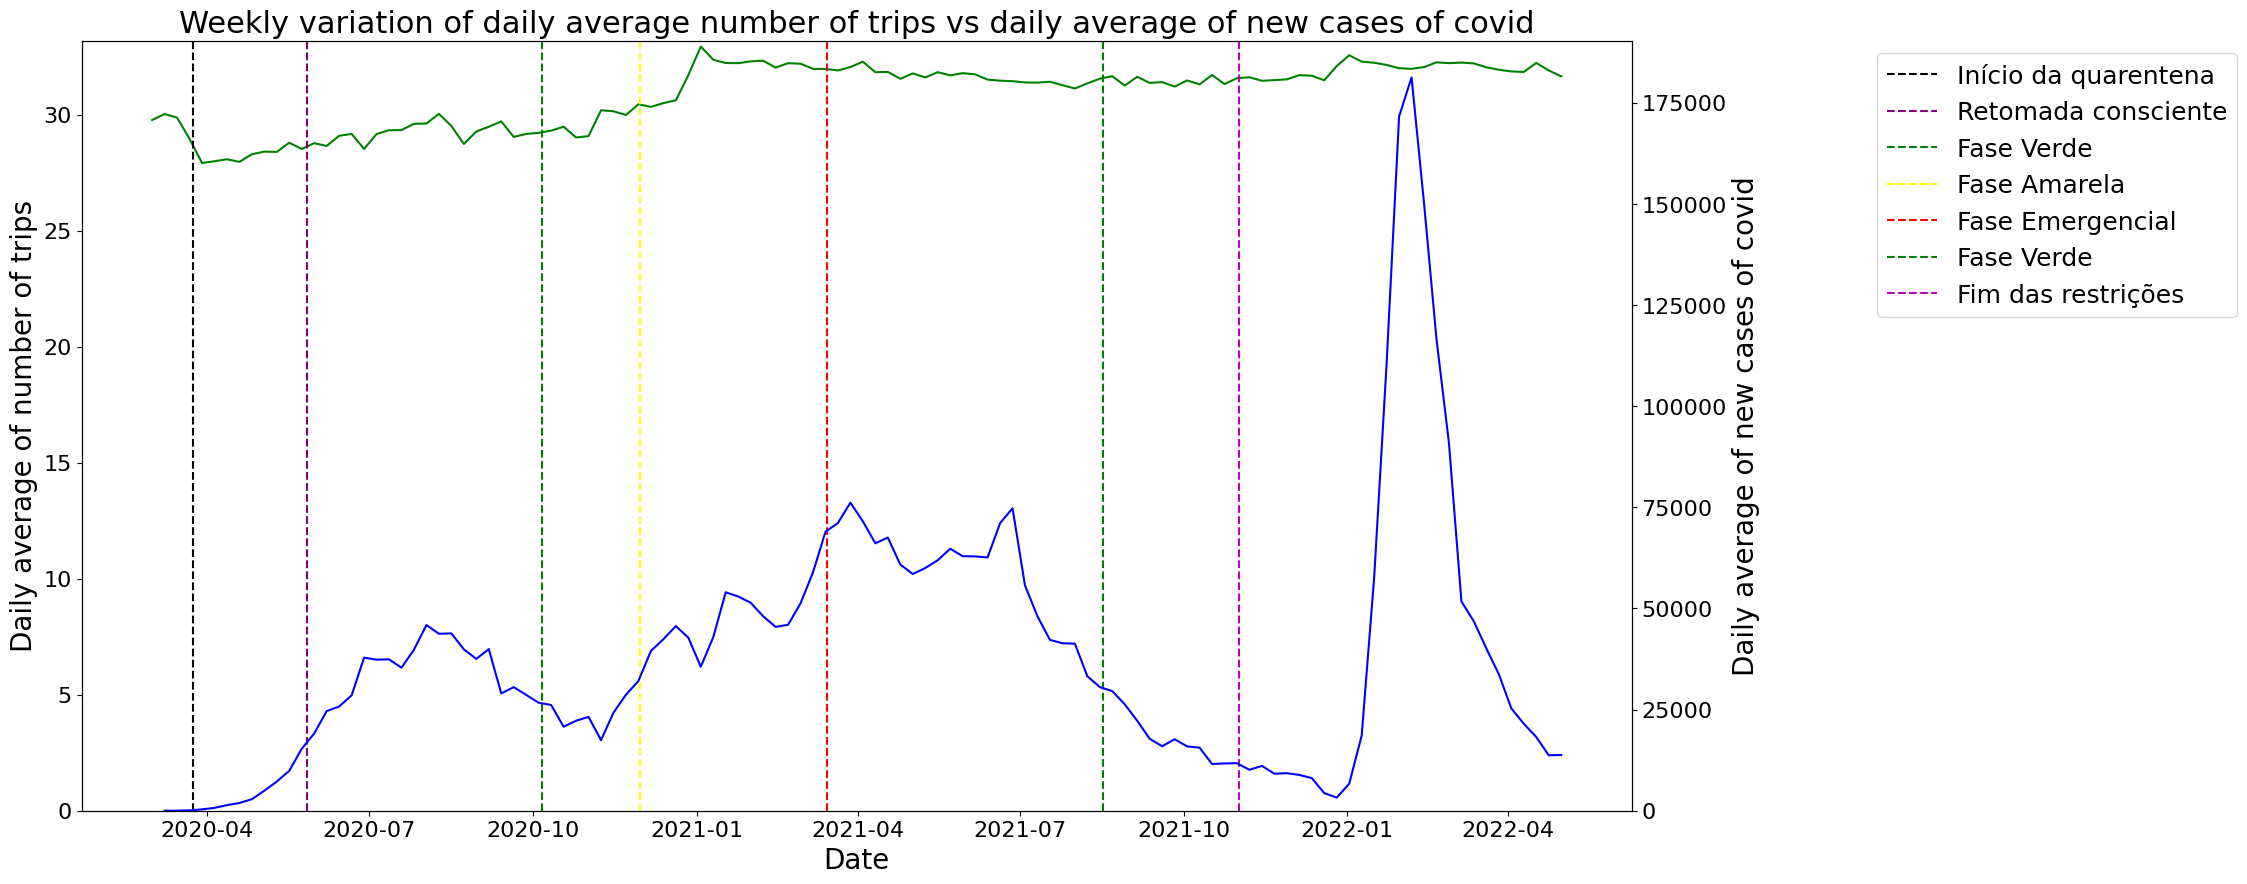

In [ ]:
variable = 'age'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)